<a href="https://colab.research.google.com/github/NirmalanMohan/Project_WMU102/blob/readme-edits/MAKERS_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Blood Donation prediction with Machine Learning**

**INTRODUCTION**

Human blood is the essential constituent of life and there is no replacement for it. There has always been a severe shortage of human blood in underdeveloped countries like India. According to a research on India's National Estimation of Blood Requirement, the country has several obstacles in maintaining an adequate supply of blood and its derivatives. WHO has emphasises that a country's blood requirements may be achieved if only 1% of its eligible population donates. Potential donors can be found proper preparation. (source: https://www.igi-global.com/gateway/article/full-text)

Data analytics and machine learning play an important role in studying huge datasets to find hidden trends or information from the data and predict outcomes accordingly. In this project, we have proposed a few blood donation prediction models and compare their accuracy for better prediction of blood donation based on a few external factors including blood type, frequency, monetary, and times.

Steps:

Import Necessary Libraries
Read In and Explore the Data
Data Analysis
Data Cleaning
Data Visualization
Choosing the Best Model
Discussion
Conclusion


##**1. Import necessary Libraries**
Firstly, we need to import necessary libraries such as pandas, numpy and seaborn.

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

After that, we upload the donors dataset.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_donor_004 (3).csv to dataset_donor_004 (3).csv


##**2. Read in and Explore the Data**
It is time to read in our training and testing data using pd.read_csv and take a first look at the training data using the describe function, df().

In [3]:
df = pd.read_csv('dataset_donor_004 (3).csv')

Since the blood type cannot be read as in alphabet, it needs to be declared as an integer data. Hence;

*   A- = 1
*   A+ = 2
*   B- = 3
*   B+ = 4
*   O- = 5
*   O+ = 6








In [4]:
df

,BLOOD TYPE,Frequency,Monetary,Times,Whether he/she donated blood in Dec 2020
0,6,50,12500,98,1
1,1,13,3250,28,1
2,6,16,4000,35,1
3,4,20,5000,45,1
4,6,24,6000,77,0
...,...,...,...,...,...
195,6,5,1250,47,1
196,6,8,2000,38,1
197,4,6,1500,47,0
198,2,7,1750,29,0


**Dataset:** The dataset is taken from https://www.kaggle.com/shivan118/blood-donation-analysis/notebook

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

In [5]:
df.describe(include="all")

,BLOOD TYPE,Frequency,Monetary,Times,Whether he/she donated blood in Dec 2020
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.610000,7.120000,1780.000000,29.685000,0.395000
std,1.661839,6.398461,1599.615218,24.353671,0.490077
min,1.000000,1.000000,250.000000,2.000000,0.000000
25%,4.000000,3.000000,750.000000,11.000000,0.000000
50%,6.000000,6.000000,1500.000000,26.000000,0.000000
75%,6.000000,9.000000,2250.000000,45.000000,1.000000
max,6.000000,50.000000,12500.000000,98.000000,1.000000


There is 200 donors in our dataset. 
1. Blood type: O+ Donors are mostly donating.
2. Frequency: This is the total number of donations that the donor has done. An average donor has donated 7 times.
3. Monetary: This is the total amount of blood that the donor has donated in millilitre (ml). An average of 1780 ml donated by 1 donor.
4. Times: This is the number of months since the donor's first donation. 
5. Whether they donated on Dec 2020: This gives whether person donated blood in Dec 2020. 



##**3. Data Analysis**
We are going to consider the features in the dataset and how complete they are.


* Donors : int64

* Frequency : int64

* Monetary : int64

* Times : int64

* Whether he/she donated blood in Dec 2020 : int64

In [6]:
print(df.columns)

Index(['BLOOD TYPE', 'Frequency', 'Monetary', 'Times',
       'Whether he/she donated blood in Dec 2020'],
      dtype='object')


In [7]:
print(pd.isnull(df).sum())

BLOOD TYPE                                  0
Frequency                                   0
Monetary                                    0
Times                                       0
Whether he/she donated blood in Dec 2020    0
dtype: int64


In [8]:
df

,BLOOD TYPE,Frequency,Monetary,Times,Whether he/she donated blood in Dec 2020
0,6,50,12500,98,1
1,1,13,3250,28,1
2,6,16,4000,35,1
3,4,20,5000,45,1
4,6,24,6000,77,0
...,...,...,...,...,...
195,6,5,1250,47,1
196,6,8,2000,38,1
197,4,6,1500,47,0
198,2,7,1750,29,0


In [9]:
print("Attributes       Number of non-Zeroes")
df.astype(bool).sum(axis=0)

Attributes       Number of non-Zeroes


BLOOD TYPE                                  200
Frequency                                   200
Monetary                                    200
Times                                       200
Whether he/she donated blood in Dec 2020     79
dtype: int64

In [10]:
print("Attributes       Number of Zeroes (out of 2000)")
(df == 0).astype(int).sum(axis=0)

Attributes       Number of Zeroes (out of 2000)


BLOOD TYPE                                    0
Frequency                                     0
Monetary                                      0
Times                                         0
Whether he/she donated blood in Dec 2020    121
dtype: int64

Assumptions made:

A person with O+ blood type will have higer tendency in donating blood.

These assumptions may be biased as a person with other blood type is not necesarily won't donate.


##**4. Data Cleaning**

**Frequency**
There isn't much ones in 'Frequency', hence, we decided to drop the whole row if 'Frequency'=1. 

In [11]:
df = df[df.Frequency  != 1]

In [12]:
df.describe(include="all")

,BLOOD TYPE,Frequency,Monetary,Times,Whether he/she donated blood in Dec 2020
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,4.679775,7.876404,1969.101124,33.106742,0.421348
std,1.648055,6.387347,1596.836661,23.659660,0.495168
min,1.000000,2.000000,500.000000,2.000000,0.000000
25%,4.000000,4.000000,1000.000000,16.000000,0.000000
50%,6.000000,6.000000,1500.000000,28.000000,0.000000
75%,6.000000,10.000000,2500.000000,46.000000,1.000000
max,6.000000,50.000000,12500.000000,98.000000,1.000000


Now 'Frequency' minimum value is no longer one. Data count is 178. We proceed with frequency more than 1 times. 

We find that, just the frequency is not related in the prediction. So that we removed those donated just once.

##**5.  Data Visualization**

Some predictions are made : 
*	The donors with frequency once will affect blood donation.
*	The donors with O+ blood are predicted to have higher chance of donating.
*	The monetary value of donors will not affect the blood donation.
*	The donated times will affect the donation.
*	Whether he/she donated blood in Dec 2020 plays an important role in this prediction.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

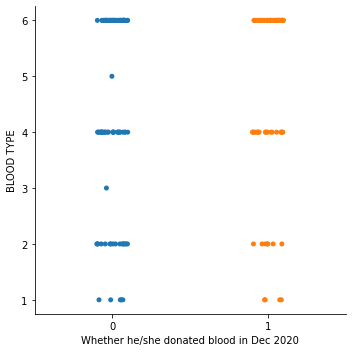

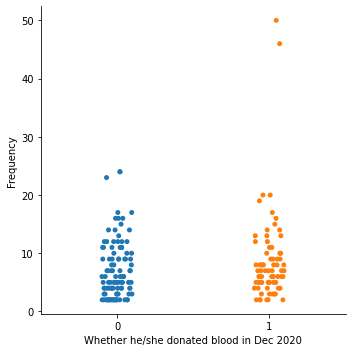

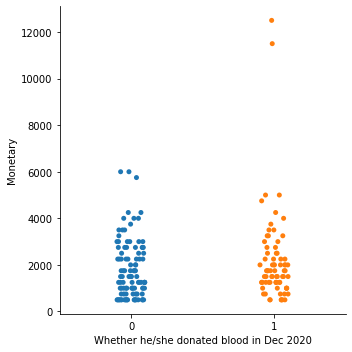

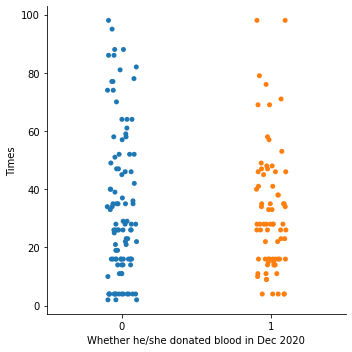

In [13]:
for col in df.columns:
  if col != "Whether he/she donated blood in Dec 2020":
      sns.catplot("Whether he/she donated blood in Dec 2020", col, 
               data = df)

##**6. Choosing the Best Model**
**Testing Different Models**


We will be testing the following models with our training data:

*   KNN or k-Nearest Neighbors
*   Decision Tree Classifier
*   Gaussian Naive Bayes
*   Random Forest Classifier

Now, we split the dataset into training and test set.

In [14]:
X= df.drop(['Whether he/she donated blood in Dec 2020'],axis=1)

In [15]:
X

,BLOOD TYPE,Frequency,Monetary,Times
0,6,50,12500,98
1,1,13,3250,28
2,6,16,4000,35
3,4,20,5000,45
4,6,24,6000,77
...,...,...,...,...
195,6,5,1250,47
196,6,8,2000,38
197,4,6,1500,47
198,2,7,1750,29


In [16]:
y=df['Whether he/she donated blood in Dec 2020']

In [17]:
y

0      1
1      1
2      1
3      1
4      0
      ..
195    1
196    1
197    0
198    0
199    0
Name: Whether he/she donated blood in Dec 2020, Length: 178, dtype: int64

In [18]:
#Import Module
# We create our training and testing datasets with a train_test_split method
# At the moment train set size will be 80% of the data and test set size 20%
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)

In [19]:
train_X.shape, test_X.shape

((142, 4), (36, 4))

The training set consists of 160 rows, while the test set consists of 40 rows.The ratio of training set: test set is 4:1.

In [20]:
train_X

,BLOOD TYPE,Frequency,Monetary,Times
145,6,3,750,16
181,5,4,1000,16
144,6,2,500,9
33,6,9,2250,26
97,6,9,2250,38
...,...,...,...,...
16,6,14,3500,48
62,6,10,2500,49
76,4,4,1000,16
138,6,5,1250,19


In [21]:
test_X

,BLOOD TYPE,Frequency,Monetary,Times
18,4,6,1500,15
191,6,7,1750,52
2,6,16,4000,35
23,2,6,1500,16
0,6,50,12500,98
95,4,7,1750,28
139,6,2,500,11
180,2,4,1000,26
127,6,4,1000,26
111,6,9,2250,46


In [22]:
train_y.shape, test_y.shape

((142,), (36,))

In [23]:
train_y

145    1
181    0
144    1
33     1
97     1
      ..
16     1
62     0
76     1
138    0
176    1
Name: Whether he/she donated blood in Dec 2020, Length: 142, dtype: int64

In [24]:
test_y

18     1
191    0
2      1
23     1
0      1
95     0
139    0
180    1
127    0
111    0
197    0
102    0
103    0
184    0
79     0
113    1
72     1
86     0
36     1
101    1
80     1
22     1
110    1
64     1
73     0
148    1
35     1
11     0
77     0
43     0
74     1
152    0
107    0
28     1
121    1
55     1
Name: Whether he/she donated blood in Dec 2020, dtype: int64

KNN (k-Nearest Neighbors)



In [25]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_y)
    pred_1 = knn.predict(test_X)
    scores[k] = metrics.accuracy_score(test_y, pred_1)
    scores_list.append(metrics.accuracy_score(test_y, pred_1))

In [26]:
print("-------------------------------")
print("k-value |     Test Accuracy")
print("-------------------------------")
for a,b in zip(k_range, scores_list):
  print(a, "\t|  ", b)
print("-------------------------------")

-------------------------------
k-value |     Test Accuracy
-------------------------------
1 	|   0.4722222222222222
2 	|   0.5
3 	|   0.5833333333333334
4 	|   0.5
5 	|   0.4722222222222222
6 	|   0.5277777777777778
7 	|   0.4722222222222222
8 	|   0.4722222222222222
9 	|   0.4444444444444444
10 	|   0.4722222222222222
11 	|   0.4444444444444444
12 	|   0.4444444444444444
13 	|   0.4444444444444444
14 	|   0.4722222222222222
15 	|   0.4722222222222222
16 	|   0.4722222222222222
17 	|   0.4722222222222222
18 	|   0.4722222222222222
19 	|   0.4444444444444444
20 	|   0.4722222222222222
21 	|   0.4722222222222222
22 	|   0.4166666666666667
23 	|   0.4722222222222222
24 	|   0.5
25 	|   0.4722222222222222
-------------------------------


Text(0, 0.5, 'Testing Accuracy')

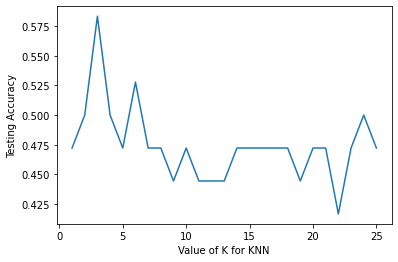

In [27]:
#We plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# We can ask the model to directly calculate the accuracy
knn.score(train_X, train_y)

0.7816901408450704

In [30]:
knn.score(test_X,test_y)

0.5833333333333334

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
pred_1 = knn.predict(test_X)
print(pred_1[:10])

[1 0 0 1 0 1 0 0 0 0]


In [32]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(test_y, pred_1))

Accuracy: 0.5833333333333334


In [33]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_1))

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.64      0.47      0.55        19

    accuracy                           0.58        36
   macro avg       0.59      0.59      0.58        36
weighted avg       0.60      0.58      0.58        36



Note:

*   The recall means "how many of this class you find over the whole number of element of this class"
*   The precision will be "how many are correctly classified among that class"
*   The f1-score is the harmonic mean between precision & recall
*   The support is the number of occurence of the given class in your dataset



In [34]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_1))

Confusion matrix:
[[12  5]
 [10  9]]


Text(0.5, 257.44, 'Predicted label')

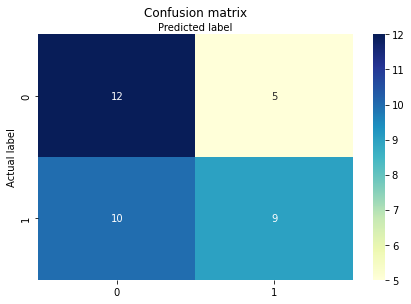

In [35]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Note: A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

[[TN FP]

[FN TP]]

TP: True postive TN: True negativeFP: False positive *FN: False Negative

Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

In [37]:
dtc=DecisionTreeClassifier()


In [38]:
dtc=dtc.fit(train_X,train_y)

In [39]:
pred_2=dtc.predict(test_X)

In [40]:
print(pred_2[:10])

[0 0 0 0 1 1 0 0 0 0]


In [41]:
print("Accuracy:", accuracy_score(test_y, pred_2))

Accuracy: 0.5555555555555556


In [42]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_2))

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.76      0.62        17
           1       0.64      0.37      0.47        19

    accuracy                           0.56        36
   macro avg       0.58      0.57      0.54        36
weighted avg       0.58      0.56      0.54        36



In [43]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_2))

Confusion matrix:
[[13  4]
 [12  7]]


Text(0.5, 257.44, 'Predicted label')

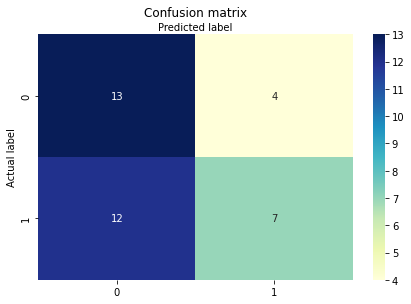

In [44]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_2)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Naive-Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb=GaussianNB()

In [47]:
nb.fit(train_X,train_y)

GaussianNB()

In [48]:
pred_3=nb.predict(test_X)

In [49]:
print(pred_3[:10])

[0 0 1 0 1 0 0 0 0 0]


In [50]:
print("Accuracy:", accuracy_score(test_y, pred_3))

Accuracy: 0.5277777777777778


In [51]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_3))

Classification report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        17
           1       1.00      0.11      0.19        19

    accuracy                           0.53        36
   macro avg       0.75      0.55      0.43        36
weighted avg       0.76      0.53      0.42        36



In [52]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_3))

Confusion matrix:
[[17  0]
 [17  2]]


Text(0.5, 257.44, 'Predicted label')

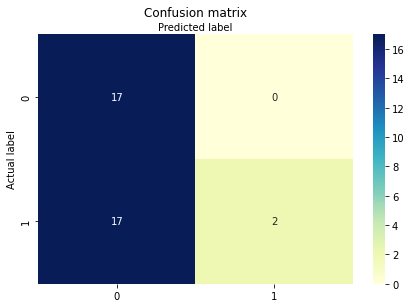

In [53]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_3)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
ran=RandomForestClassifier(n_estimators=100)

In [56]:
ran.fit(train_X,train_y)

RandomForestClassifier()

In [57]:
pred_4=ran.predict(test_X)

In [58]:
print(pred_4[:10])

[0 0 1 0 1 1 0 0 0 0]


In [59]:
print("Accuracy:", accuracy_score(test_y, pred_4))

Accuracy: 0.5555555555555556


In [60]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_4))

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.76      0.62        17
           1       0.64      0.37      0.47        19

    accuracy                           0.56        36
   macro avg       0.58      0.57      0.54        36
weighted avg       0.58      0.56      0.54        36



In [61]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_4))

Confusion matrix:
[[13  4]
 [12  7]]


Text(0.5, 257.44, 'Predicted label')

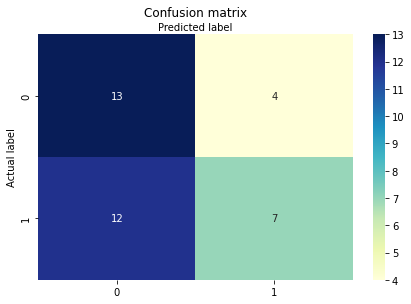

In [62]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_4)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

To compare the accuracy of four different models:

In [63]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree','Naive Bayes', 'Random Forest'],
    'Accuracy': [accuracy_score(test_y, pred_1), accuracy_score(test_y, pred_2), accuracy_score(test_y, pred_3), accuracy_score(test_y, pred_4)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,KNN,0.583333
1,Decision Tree,0.555556
3,Random Forest,0.555556
2,Naive Bayes,0.527778


**7. DISCUSSION**

Blood is a scarce resource; its donation saves the lives of those in need. Countries approach blood donation in different ways, running the gamut from privately-run to state-run programs, with or without monetary compensation, and with varying degrees of public campaigns for action. As such, blood donation rates differ across different countries; for example, approximately 3.2%, 1.5%,
0.8%, and 0.5% of the population donates in high-, upper-middle-, lower-middle-, and low-income countries, with varying rates of voluntary versus paid donors. 

The attributes that the prediction model uses are associated with KNN or k-Nearest Neighbors, Decision Tree Classifier, Gaussian Naive Bayes and Random Forest Classifier. 

The** K-nearest neighbour (KNN)** algorithm is one of the simplest and earliest classification algorithms. It can be thought a simpler version of an Naive Bayes (NB) classifier. Unlike the NB technique, the KNN algorithm does not require to consider probability values. The ‘K’ is the KNN algorithm is the number of nearest neighbours considered to take ‘vote’ from. We select these k nearest neighbors based on Euclidean distance. Among these k neighbours, the number of data points in each category is counted, and the new data point is assigned to that category where we got the most neighbours in.

**Decision Tree Classification** is the most powerful classifier. A Decision tree is a flowchart like a tree structure, where each internal node denotes a test on an attribute (a condition), each branch represents an outcome of the test (True or False), and each leaf node (terminal node) holds a class label. A set of decision trees are built in parallel on tractable size training data sets which are a subset of the original data. Each learned decision tree will be reduced to a set of rules, conflicting rules resolved and the resultant rules merged into one set. Results from cross validation experiments on a data set suggest this approach may be effectively applied to large sets of data.

**Naive Bayes Classifier** works on the basis of Bayes’ Theorem. The fundamental assumptions made are that all the features are independent of one another and contribute equally to the outcome; all are of equal importance. But these assumptions are not always valid in real life (disadvantage of Naive Bayes). It is a probabilistic classifier model whose crux is the Bayes’ theorem. From our predictions before, variables such as 'Insulin' may not be good indicator of diabetes, hence there is no wonder that NB method gives lower accuracy as it consider the contribution of each variable equally.

**Random Forest** is considered as a highly accurate and robust method because of the number of decision trees participating in the process.Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees.

We believe that this study provides a significant advance. In particular, this study has three practical implications. First, the result of this study implies a minimisation of the number of questions and, therefore, the response time for people who donate. Clearly, this will cause a higher percentage of survey completion and the possibility of improving blood management planning. Second, the registry of donation intentions will allow customisation, targeting and the development of attractive and appealing practices. So, there will be an increase of the people who intend to repeat blood donation, voluntarily and altruistically, thereby raising the availability of blood. Finally, a reduction in costs derived from contacting people who wish to donate blood, and in general from the blood management system, is expected, thanks to the two previous implications.

**8.LIMITATIONS**

Due to the constraint of the dataset, we are unable to predict the gender of blood donor. Oversampling or undersampling of data had not been carried out.

**9.IMPACTS**

Prediction systems to improve the healthcare supply chain are necessary for the changing and uncertain environment of COVID-19. In that sense, blood supply forecasting is critical to making supply chain decisions and can help personalise and optimise the process for potential donors. In the past, the TPB has been used to predict blood donations, but the data collection time is currently critical. Therefore, the decrease in these times permits data capture and enables donation prediction. 




**10.CONCLUSION**

In conclusion,the main problem with blood donation is the lack of blood of a specific type, so can test machine learning algorithms to produce better results. And the problem of donor retention raises concern for blood centers. The choice of method in Blood Donor Selection is the most present. Many techniques related to Artificial Intelligence are used in different studies. Other features with few articles, such as Techniques and methods, Blood Donor Selection, and Laboratory and Transport of blood components, also have relevance in the process, as it helps us to understand other variables that can impact not only the quality of a blood bag for a patient but also in the best use of the effective collection since the act is voluntary.